# Кластеризация. Домашнее задание

In [222]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (12, 9)
from scipy.cluster.hierarchy import dendrogram

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation, SpectralClustering, Birch
from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture


### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
    
### Обязательное задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

### Дополнительные задания
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

In [2]:
geo = pd.read_excel(r"geo.xlsx").drop(columns='Unnamed: 0')
# geo_comment = pd.read_excel(r"geo_comment.xlsx").drop(columns='Unnamed: 0')

In [3]:
geo

,x,y,comment_class
0,37.612416,55.777454,-1
1,37.612416,55.777454,-1
2,37.603298,55.742108,-1
3,37.558526,55.728758,-1
4,37.566431,55.731794,-1
...,...,...,...
108801,37.454528,55.792331,-1
108802,37.384325,55.899068,-1
108803,37.421066,55.848756,1
108804,37.448509,55.793065,-1


In [54]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(geo[['x','y']])

Кластеров: 45
Кластеры: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]


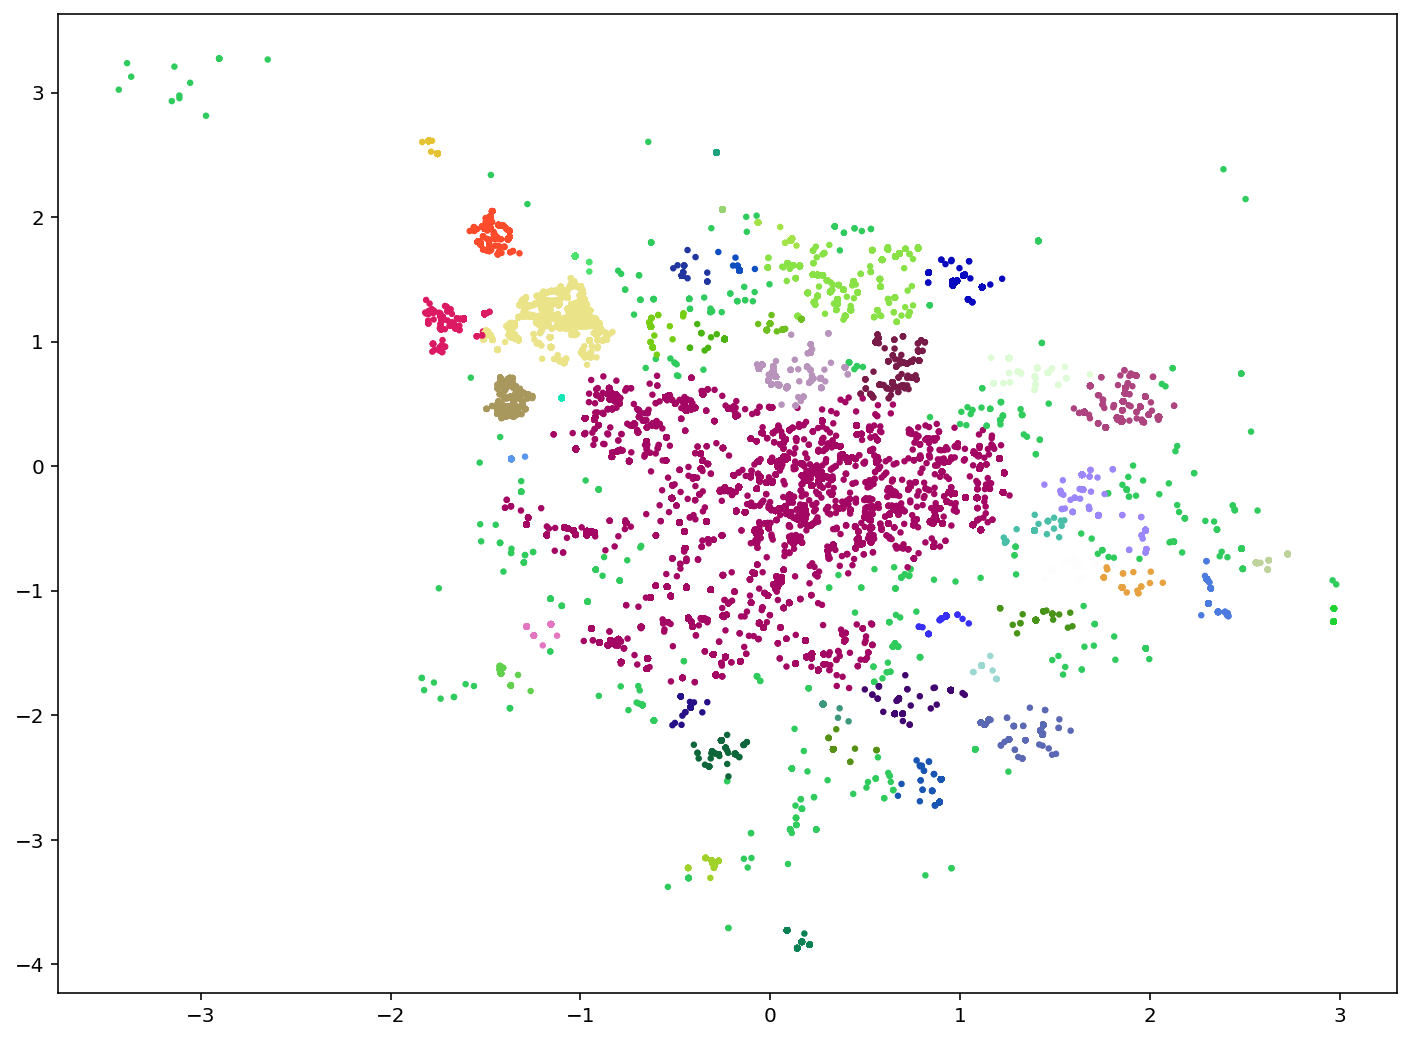

In [215]:
dbs = DBSCAN(eps=0.13, min_samples=40, n_jobs=-1)

y_pred = dbs.fit_predict(X_scaled)

print(f'Кластеров: {len(np.unique(y_pred))}\nКластеры: {np.unique(y_pred)}')

nvals = len(np.unique(y_pred))
colors = np.random.random(nvals*3).reshape(nvals,3)
levels = np.arange(nvals + 1) - 0.5
cmap, norm = from_levels_and_colors(levels, colors)

plt.scatter(X_scaled[:,0],X_scaled[:,1], c=y_pred, cmap=cmap, s = 5)

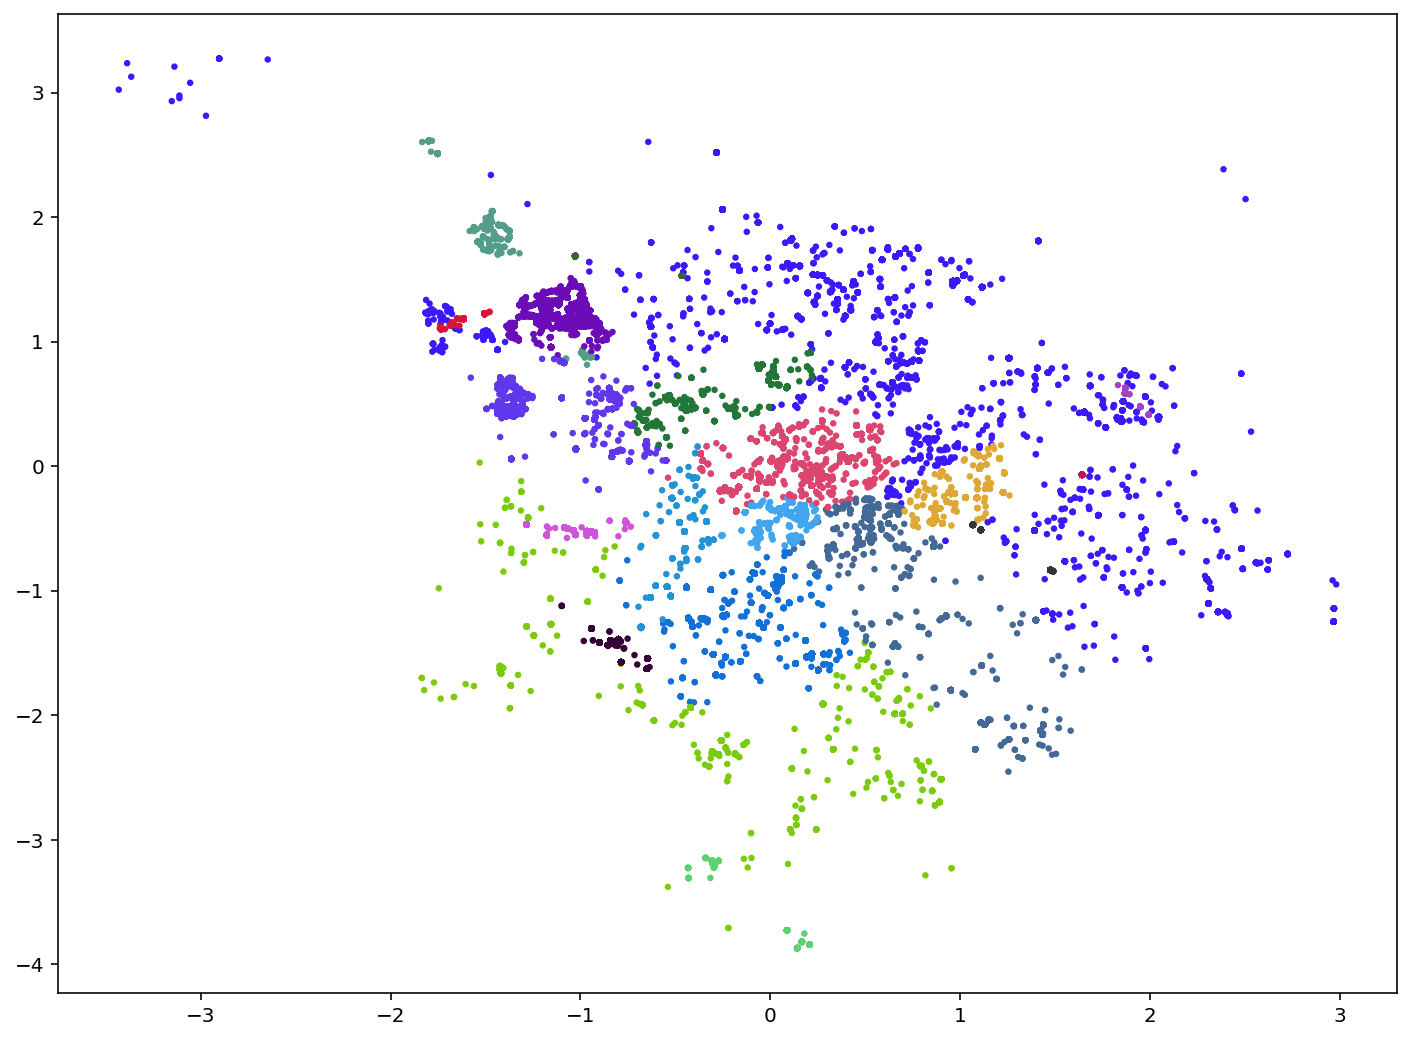

In [212]:
gm = GaussianMixture(n_components=20, random_state=0)

y_pred = gm.fit_predict(X_scaled)

nvals = len(np.unique(y_pred))
colors = np.random.random(nvals*3).reshape(nvals,3)
levels = np.arange(nvals + 1) - 0.5
cmap, norm = from_levels_and_colors(levels, colors)

plt.scatter(X_scaled[:,0],X_scaled[:,1], c=y_pred, cmap=cmap, s = 5)

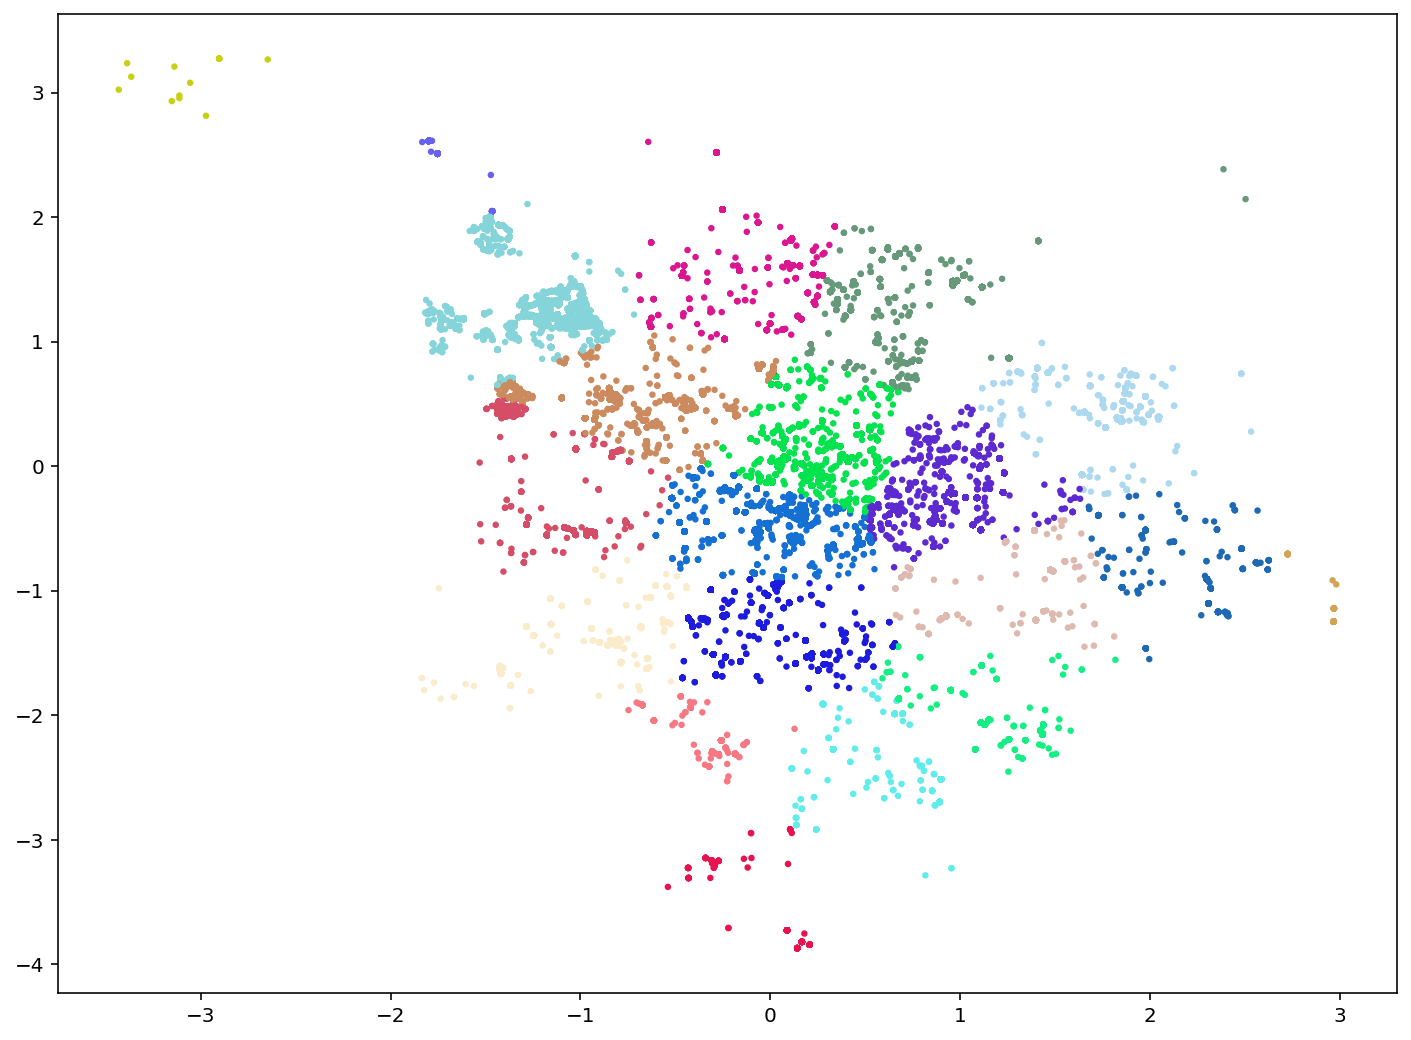

In [223]:
brc = Birch(n_clusters=None)

y_pred = brc.fit_predict(X_scaled)

nvals = len(np.unique(y_pred))
colors = np.random.random(nvals*3).reshape(nvals,3)
levels = np.arange(nvals + 1) - 0.5
cmap, norm = from_levels_and_colors(levels, colors)

plt.scatter(X_scaled[:,0],X_scaled[:,1], c=y_pred, cmap=cmap, s = 5)

Пожалуй, лучший вариант)

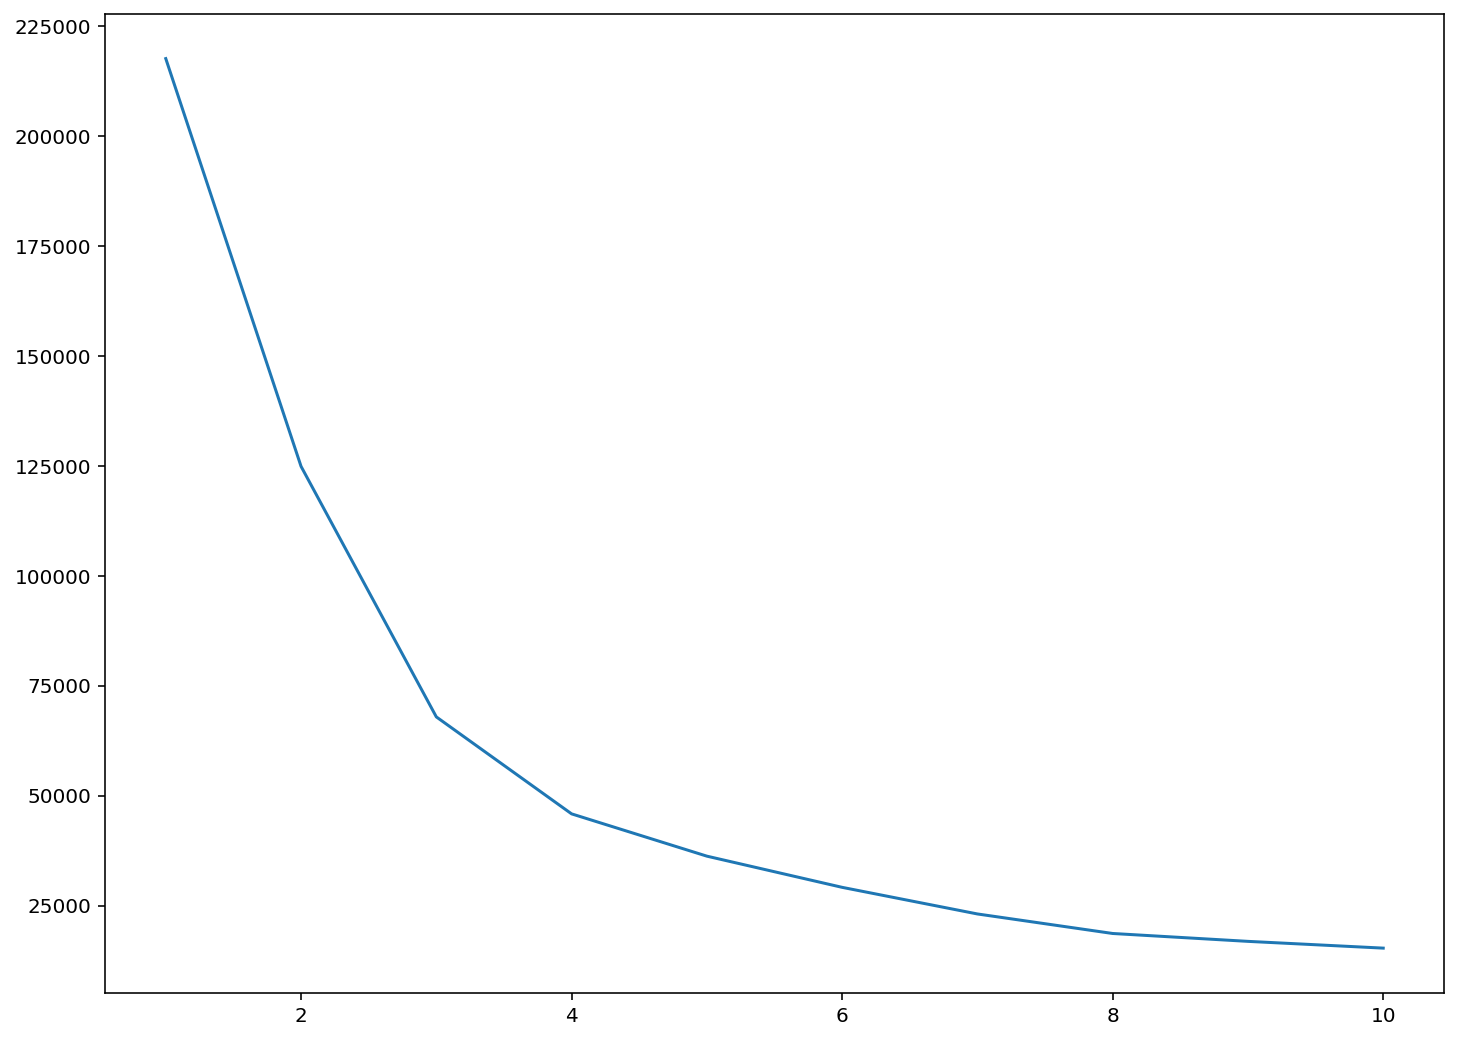

In [227]:
k_inertia = []
ks = range(1,11)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled, )
    k_inertia.append(clf_kmeans.inertia_)
plt.plot(ks, k_inertia)

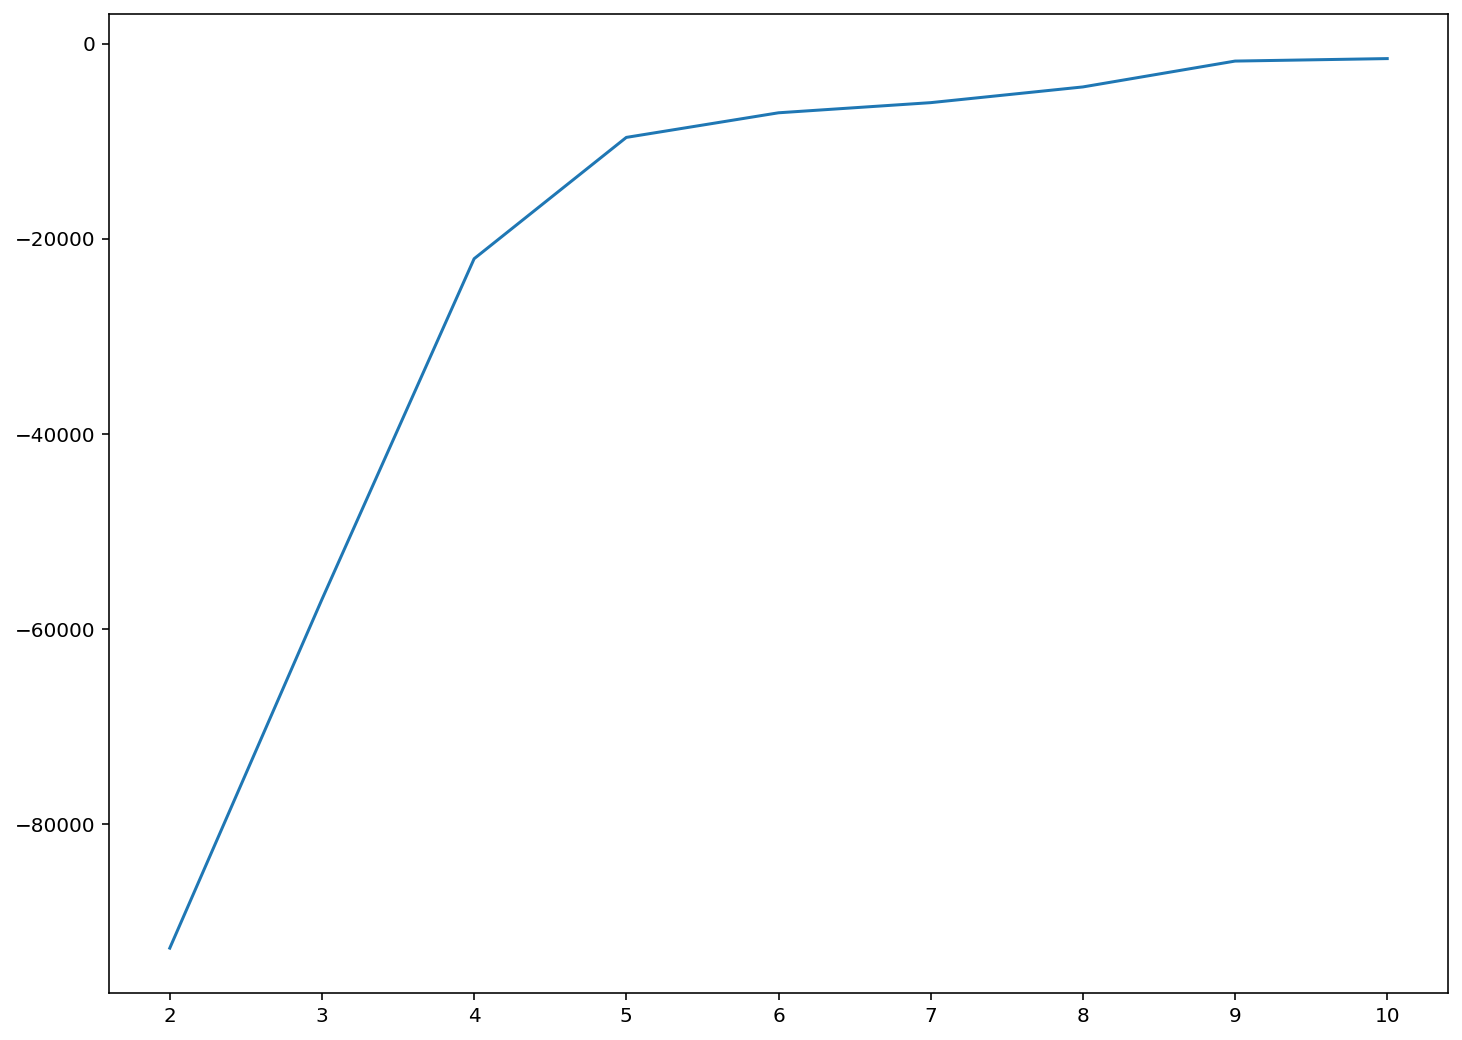

In [228]:
diff = np.diff(k_inertia)
plt.plot(ks[1:], diff)

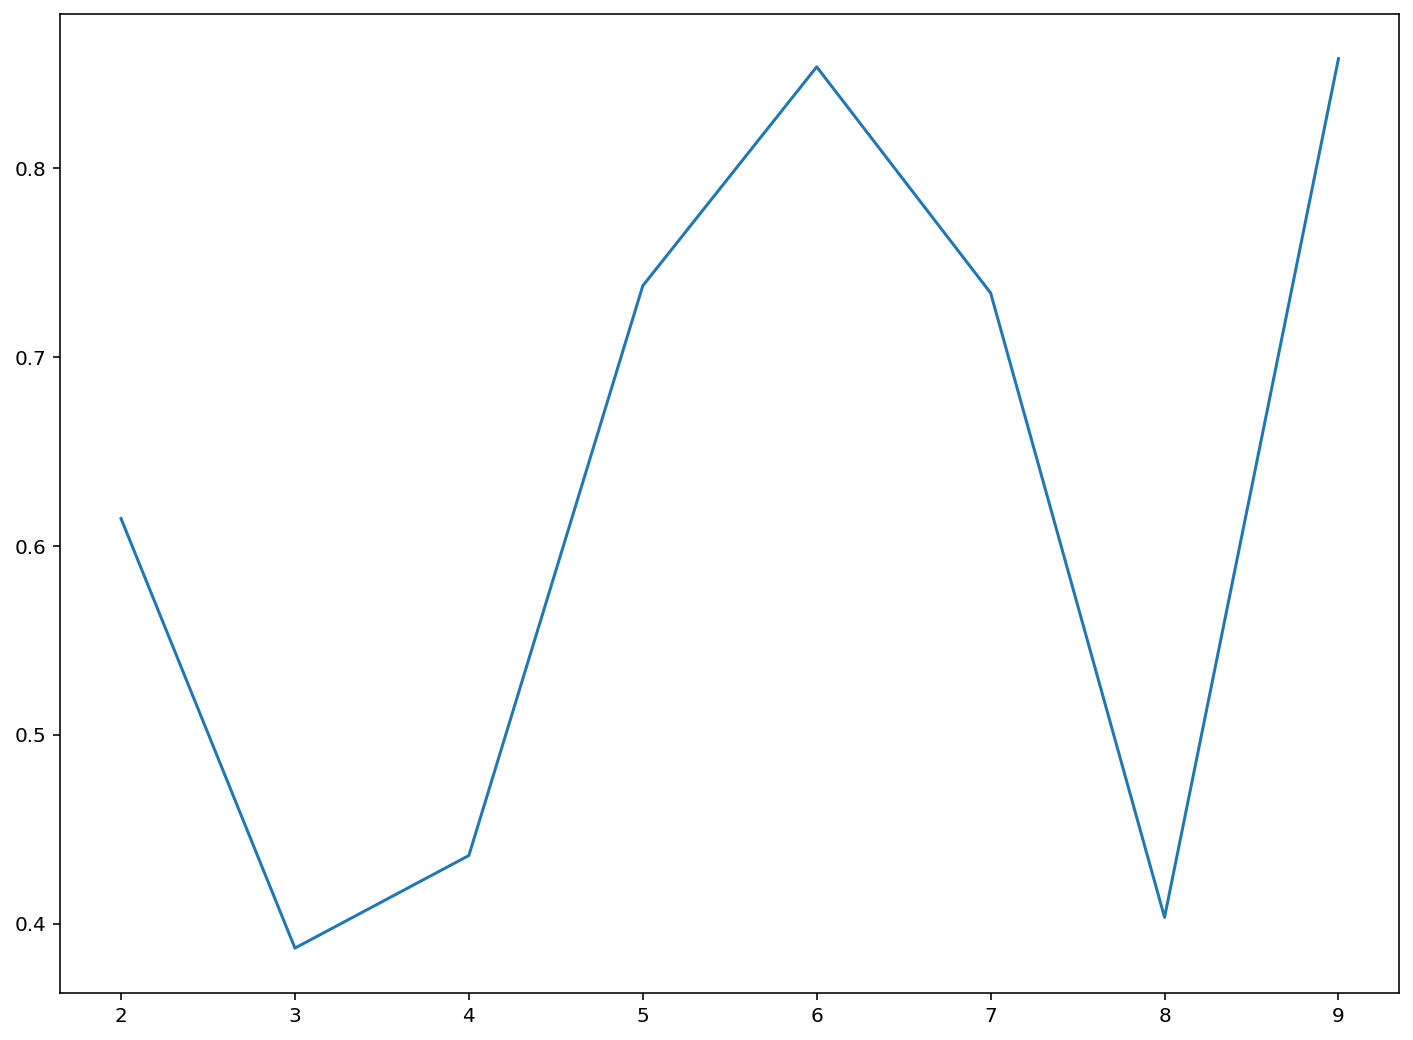

In [229]:
diff_r = diff[1:] / diff[:-1]
plt.plot(ks[1:-1], diff_r)

In [230]:
k_opt = ks[np.argmin(diff_r)+1]
k_opt

3

Правда я не был бы так уверен, что это оптимальное значение))  
Ну, вернее, для k-mean оно мб и оптмальное, вот только не отражает действительность)

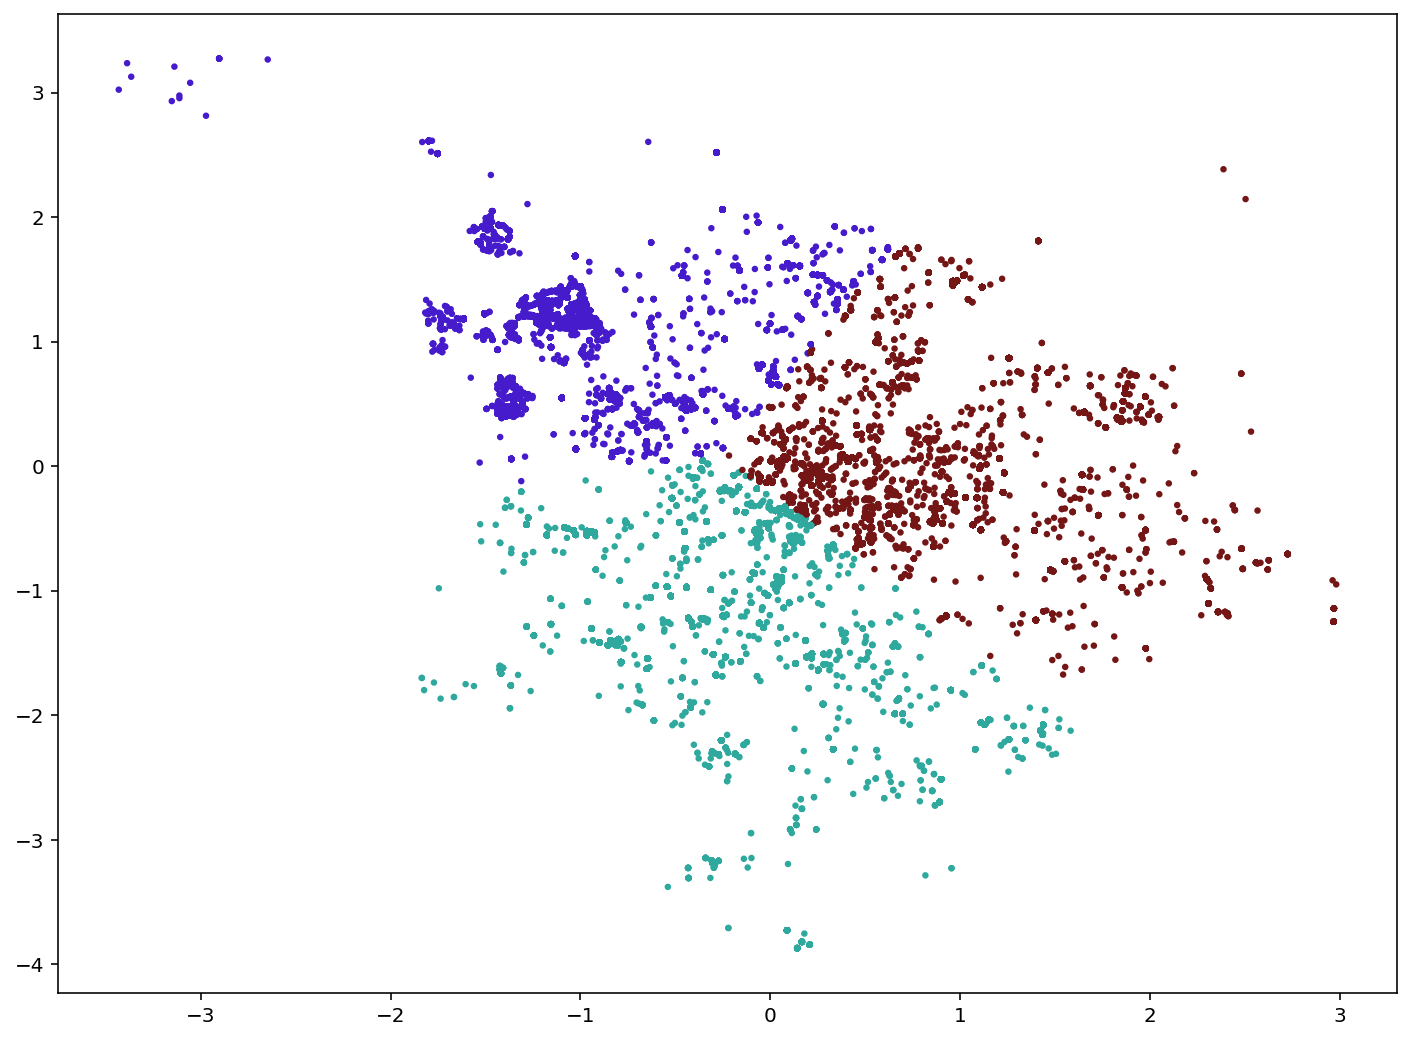

In [231]:
kms = KMeans(n_clusters=3)

y_pred = kms.fit_predict(X_scaled)

nvals = len(np.unique(y_pred))
colors = np.random.random(nvals*3).reshape(nvals,3)
levels = np.arange(nvals + 1) - 0.5
cmap, norm = from_levels_and_colors(levels, colors)

plt.scatter(X_scaled[:,0],X_scaled[:,1], c=y_pred, cmap=cmap, s = 5)